In [1]:
"""
Purpose: Examine the CO2 output per movie screening. 
Author: Hasnain Cheena
Date: 18/11/2018
"""

'\nPurpose: Examine the CO2 output per movie screening. \nAuthor: Hasnain Cheena\nDate: 18/11/2018\n'

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#read in the various csv files 
CO2_csv_path = r'C:\Users\hasna\Desktop\Smell of Fear\NumericalData\CO2_data.csv'
CO2_df = pd.read_csv(CO2_csv_path, usecols = ['Time','CO2'], header = 0, nrows = 74208)
#CO2 only goes to row 74209

In [4]:
print(CO2_df)

                        Time      CO2
0      '12/18/2013 11:46:00'  610.208
1      '12/18/2013 11:46:30'  609.304
2      '12/18/2013 11:47:00'  608.475
3      '12/18/2013 11:47:30'  607.667
4      '12/18/2013 11:48:00'  606.660
5      '12/18/2013 11:48:30'  605.900
6      '12/18/2013 11:49:00'  605.213
7      '12/18/2013 11:49:30'  604.763
8      '12/18/2013 11:50:00'  604.280
9      '12/18/2013 11:50:30'  603.878
10     '12/18/2013 11:51:00'  603.477
11     '12/18/2013 11:51:30'  603.094
12     '12/18/2013 11:52:00'  602.834
13     '12/18/2013 11:52:30'  602.454
14     '12/18/2013 11:53:00'  601.932
15     '12/18/2013 11:53:30'  601.703
16     '12/18/2013 11:54:00'  601.434
17     '12/18/2013 11:54:30'  601.378
18     '12/18/2013 11:55:00'  600.968
19     '12/18/2013 11:55:30'  600.696
20     '12/18/2013 11:56:00'  600.447
21     '12/18/2013 11:56:30'  600.320
22     '12/18/2013 11:57:00'  600.358
23     '12/18/2013 11:57:30'  600.469
24     '12/18/2013 11:58:00'  600.299
25     '12/1

In [5]:
#import the screening time and capacity. This is going to be done in an effort to normalize the data 
#note: useless rows(i.e movies that have no corresponding CO2 data were removed)
movie_specs_path = r'C:\Users\hasna\Desktop\Smell of Fear\NumericalData\screening_times.csv'
movie_specs_df = pd.read_csv(movie_specs_path, skiprows = [x for x in range(1,21)] ,usecols = ['movie', 'begin', 'number visitors', 'filled %', 'capacity'], header = 0)


In [6]:
print(movie_specs_df)

                               movie             begin  number visitors  \
0                           Hobbit 2  18/12/2013 14:00               31   
1                           Hobbit 2  18/12/2013 19:00              156   
2                             Carrie  18/12/2013 23:20                8   
3                 Suck Me Shakespeer  19/12/2013 10:30              113   
4                        Dinosaurier  19/12/2013 14:10               11   
5                       Walter Mitty  19/12/2013 20:00               45   
6                          Counselor  19/12/2013 22:40               29   
7                        Dinosaurier  20/12/2013 14:10                8   
8                  Belle & Sebastian  20/12/2013 16:55                8   
9                        Dinosaurier  20/12/2013 19:40                7   
10                         Counselor  20/12/2013 22:20               50   
11                Suck Me Shakespeer  21/12/2013 11:10               11   
12                       

In [7]:
#Length of movies 
movie_runtime_path = r'C:\Users\hasna\Desktop\Smell of Fear\NumericalData\movie_runtimes.csv'
movie_runtime_df = pd.read_csv(movie_runtime_path, usecols = ['movie', 'runtime'], header = 0, nrows = 6)
print(movie_runtime_df)

                             movie runtime
0                         Hobbit 2   3h 7m
1                            Buddy  1h 34m
2                    Machete Kills  1h 47m
3                     Walter Mitty   2h 5m
4              Paranormal Activity  1h 24m
5  The Hunger Games: Catching Fire  2h 26m


In [8]:
# eyeball the end zone of each screening to find a place to split the CO2 dataframe. then search for the peak. 
# note: eyeballing was liberal process
# 1 = Hobbit 2  18-12-2013 14:00 -> row 00249 to 00751
# 2 = Hobbit 2  18-12-2013 19:00 -> row 00848 to 001366
# 3 = Hobbit 2  22-12-2013 20:10 -> row 12443 to 13078
# 4 = Machete   23-12-2013 19:35 -> row 15245 to 15562
# 5 = Machete   23-12-2013 22:30 -> row 15595 to 15879
# 6 = Buddy     25-12-2013 12:10 -> row 20082 to 20326
# 7 = Buddy     25-12-2013 14:50 -> row 20408 to 20674
# 8 = Buddy     25-12-2013 17:35 -> row 20740 to 21032
# 9 = Buddy     25-12-2013 20:20 -> row 21068 to 21402
# 10 = Buddy    25-12-2013 23:10 -> row 21406 to 21654
# 11 = Buddy    26-12-2013 19:30 -> row 23836 to 24192
# 12 = Buddy    26-12-2013 22:25 -> row 24188 to 24466
# 13 = Buddy    27-12-2013 19:30 -> row 26702 to 27038
# 14 = Buddy    27-12-2013 22:25 -> row 27052 to 27432
# 15 = Buddy    28-12-2013 19:30 -> row 29358 to 29918
# 16 = Buddy    28-12-2013 22:15 -> row 29920 to 30424
# 17 = Buddy    29-12-2013 19:30 -> row 32410 to 32790
# 18 = Buddy    29-12-2013 22:25 -> row 32792 to 33216
# 19 = Buddy    30-12-2013 19:30 -> row 35264 to 35652
# 20 = Buddy    30-12-2013 22:25 -> row 35654 to 35948
# 21 = Walter   01-01-2014 16:25 -> row 40640 to 41003
# 22 = Buddy    01-01-2014 19:30 -> row 41030 to 41388
# 23 = Buddy    01-01-2014 22:25 -> row 41390 to 41744
# 24 = Walter   02-01-2014 17:15 -> row 43632 to 43980
# 25 = Walter   02-01-2014 20:15 -> row 43982 to 44355
# 26 = Walter   02-01-2014 23:15 -> row 44356 to 44688
# 27 = Walter   03-01-2014 17:15 -> row 46483 to 46838
# 28 = Walter   03-01-2014 20:15 -> row 46839 to 47222
# 29 = Walter   03-01-2014 23:15 -> row 47223 to 47542
# 30 = Walter   04-01-2014 17:15 -> row 49365 to 49706
# 31 = Walter   04-01-2014 20:15 -> row 49707 to 50080
# 32 = Walter   04-01-2014 23:15 -> row 50081 to 50484
# 33 = Walter   05-01-2014 17:15 -> row 52234 to 52581
# 34 = Walter   05-01-2014 20:15 -> row 52582 to 52943
# 35 = Walter   05-01-2014 23:15 -> row 52944 to 53260
# 36 = Walter   06-01-2014 17:15 -> row 54753 to 55107
# 37 = Walter   06-01-2014 20:15 -> row 55108 to 55470
# 38 = Walter   06-01-2014 23:15 -> row 55471 to 55770
# 39 = Walter   07-01-2014 17:15 -> row 57620 to 57968
# 40 = Walter   07-01-2014 20:15 -> row 57969 to 58336
# 41 = Walter   07-01-2014 23:15 -> row 58337 to 58692
# 42 = Walter   08-01-2014 17:15 -> row 60488 to 60844
# 43 = Walter   08-01-2014 20:15 -> row 60845 to 61202
# 44 = Walter   08-01-2014 23:15 -> row 61203 to 61563
# 45 = Hobbit 2 09-01-2014 16:30 -> row 63228 to 63706
# 46 = Paranorm 09-01-2014 20:35 -> row 63707 to 63998
# 47 = Paranorm 09-01-2014 22:35 -> row 63999 to 64358
# 48 = Hobbit 2 10-01-2014 16:30 -> row 66095 to 66574
# 49 = Paranorm 10-01-2014 20:35 -> row 66575 to 66841
# 50 = Paranorm 10-01-2014 22:35 -> row 66842 to 67288
# 51 = Hobbit 2 11-01-2014 16:30 -> row 68970 to 69477
# 52 = Paranorm 11-01-2014 20:35 -> row 69478 to 69698
# 53 = Paranorm 11-01-2014 22:35 -> row 69699 to 70162

# note: Tribute is the Hunger Games
# 54 = Hunger   26-12-2013 13:15 -> row 23072 to 23502
# 55 = Hunger   27-12-2013 13:15 -> row 25942 to 26356
# 56 = Hunger   28-12-2013 13:15 -> row 28804 to 29223
# 57 = Hunger   29-12-2013 13:15 -> row 31672 to 32090
# 58 = Hunger   30-12-2013 13:15 -> row 34540 to 34953
# 59 = Hunger   31-12-2013 13:15 -> row 37401 to 37819
# 60 = Hunger   02-01-2014 13:45 -> row 43202 to 43620
# 61 = Hunger   03-01-2014 13:45 -> row 46070 to 46488
# 62 = Hunger   04-01-2014 13:45 -> row 48931 to 49349
# 63 = Hunger   05-01-2014 13:45 a-> row 51799 to 52217
# 64 = Hunger   06-01-2014 13:45 -> row 54666 to 54752 ---> huge amount of missing data 
# 65 = Hunger   07-01-2014 13:45 -> row 57201 to 57620
# 66 = Hunger   08-01-2014 13:45 -> row 60069 to 60488

In [9]:
split_path = r'C:\Users\hasna\Desktop\Smell of Fear\NumericalData\movie_co2_split.csv'
movie_co2_split_df = pd.read_csv(split_path, header = 0)
#print(movie_co2_split_df)
#note: the from and to represent row numbers

In [10]:
#make a list of the different movie co2 frames
movie_co2_list = list()
for i in range(0,len(movie_co2_split_df)):
    goingto = movie_co2_split_df.loc[i]['to']
    goingfrom = movie_co2_split_df.loc[i]['from']
    df = CO2_df.loc[goingfrom:goingto]
    movie_co2_list.append(df)    

In [11]:
#plot naming convention used and other notes
#plot images are named such as 'Hobbit2_2' - where Hobbit2 is the movie name and the number '_2' is the 
#corresponding row number in the 'PrelimMovieAnalysisSpecs.csv'

<Figure size 432x288 with 0 Axes>

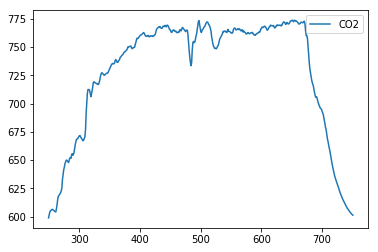

In [12]:
#display the various co2 graphs
plt.figure()
movie_co2_list[0].plot()
plt.savefig(r'Plots\Hobbit2_2')

<Figure size 432x288 with 0 Axes>

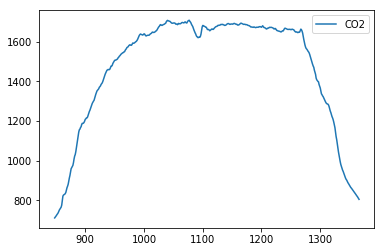

In [13]:
plt.figure()
movie_co2_list[1].plot()
plt.savefig(r'Plots\Hobbit2_3')

<Figure size 432x288 with 0 Axes>

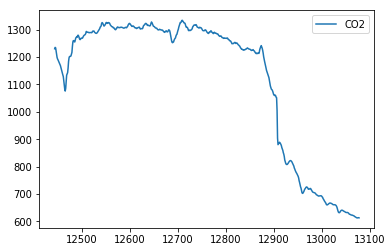

In [14]:
plt.figure()
movie_co2_list[2].plot()
plt.savefig(r'Plots\Hobbit2_4')

<Figure size 432x288 with 0 Axes>

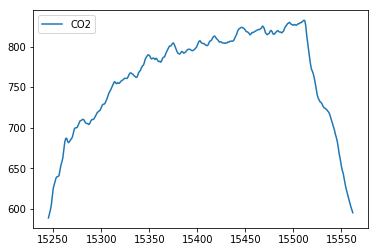

In [15]:
plt.figure()
movie_co2_list[3].plot()
plt.savefig(r'Plots\Machete_5')

<Figure size 432x288 with 0 Axes>

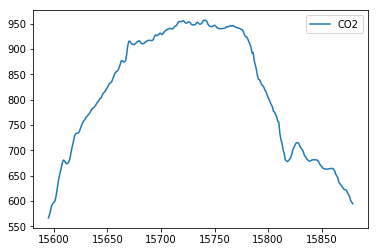

In [16]:
plt.figure()
movie_co2_list[4].plot()
plt.savefig(r'Plots\Machete_6')

<Figure size 432x288 with 0 Axes>

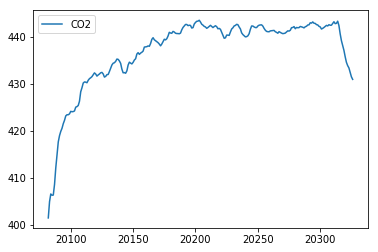

In [17]:
plt.figure()
movie_co2_list[5].plot()
plt.savefig(r'Plots\Buddy_7')

<Figure size 432x288 with 0 Axes>

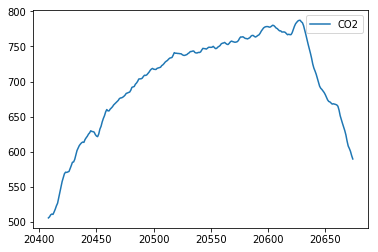

In [18]:
plt.figure()
movie_co2_list[6].plot()
plt.savefig(r'Plots\Buddy_8')

<Figure size 432x288 with 0 Axes>

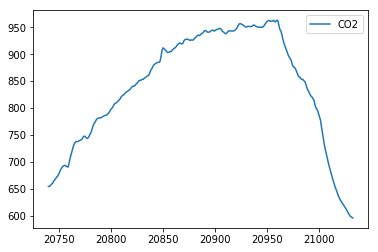

In [19]:
plt.figure()
movie_co2_list[7].plot()
plt.savefig(r'Plots\Buddy_9')

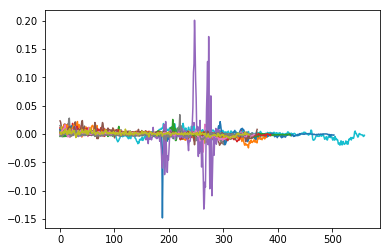

In [20]:
for k in range(5,24):
    l= movie_co2_list[k]["CO2"].tolist()
    delta = [ (l[i+1] - l[i]) / l[i] for i in range(len(l)- 1)]
    plt.plot(list(range(len(delta))),delta)

<Figure size 432x288 with 0 Axes>

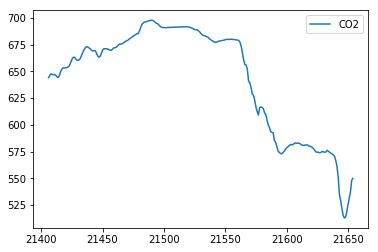

In [21]:
plt.figure()
movie_co2_list[9].plot()
plt.savefig(r'Plots\Buddy_11')

<Figure size 432x288 with 0 Axes>

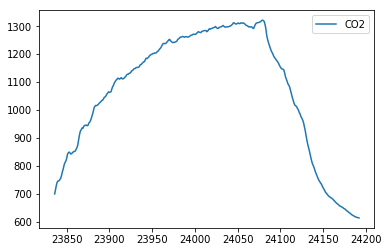

In [22]:
plt.figure()
movie_co2_list[10].plot()
plt.savefig(r'Plots\Buddy_12')

<Figure size 432x288 with 0 Axes>

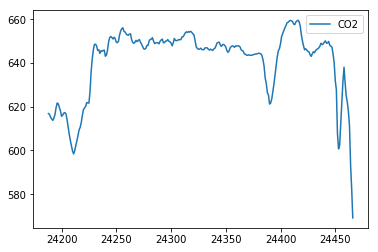

In [23]:
plt.figure()
movie_co2_list[11].plot()
plt.savefig(r'Plots\Buddy_13')

<Figure size 432x288 with 0 Axes>

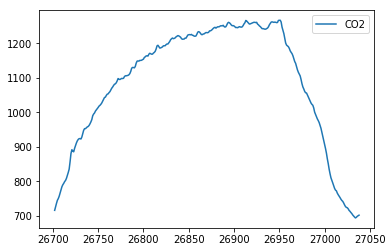

In [24]:
plt.figure()
movie_co2_list[12].plot()
plt.savefig(r'Plots\Buddy_14')

<Figure size 432x288 with 0 Axes>

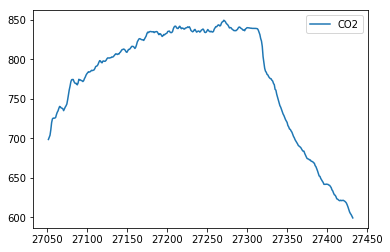

In [25]:
plt.figure()
movie_co2_list[13].plot()
plt.savefig(r'Plots\Buddy_15')

<Figure size 432x288 with 0 Axes>

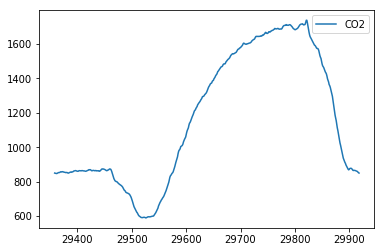

In [26]:
plt.figure()
movie_co2_list[14].plot()
plt.savefig(r'Plots\Buddy_16')

<Figure size 432x288 with 0 Axes>

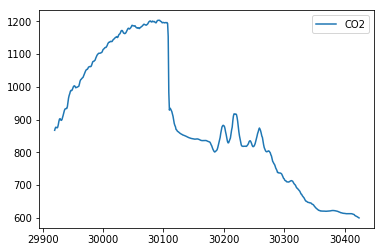

In [27]:
plt.figure()
movie_co2_list[15].plot()
plt.savefig(r'Plots\Buddy_17')

<Figure size 432x288 with 0 Axes>

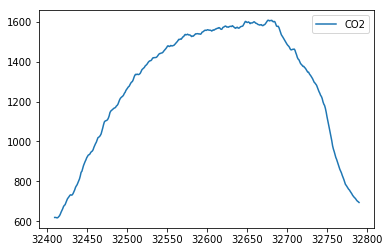

In [28]:
plt.figure()
movie_co2_list[16].plot()
plt.savefig(r'Plots\Buddy_18')

<Figure size 432x288 with 0 Axes>

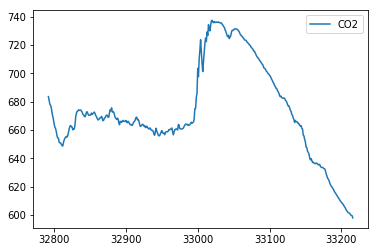

In [29]:
plt.figure()
movie_co2_list[17].plot()
plt.savefig(r'Plots\Buddy_19')

<Figure size 432x288 with 0 Axes>

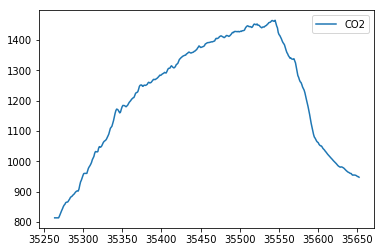

In [30]:
plt.figure()
movie_co2_list[18].plot()
plt.savefig(r'Plots\Buddy_20')

<Figure size 432x288 with 0 Axes>

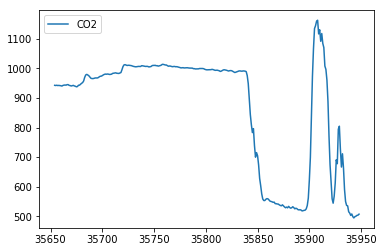

In [31]:
plt.figure()
movie_co2_list[19].plot()
plt.savefig(r'Plots\Buddy_21')

<Figure size 432x288 with 0 Axes>

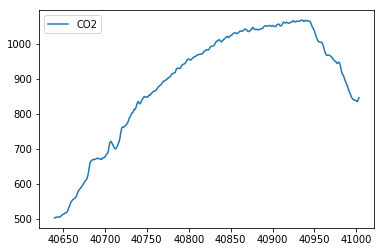

In [32]:
plt.figure()
movie_co2_list[20].plot()
plt.savefig(r'Plots\Walter_22')

<Figure size 432x288 with 0 Axes>

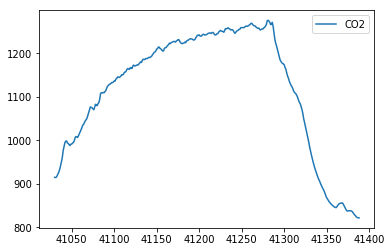

In [33]:
plt.figure()
movie_co2_list[21].plot()
plt.savefig(r'Plots\Buddy_23')

<Figure size 432x288 with 0 Axes>

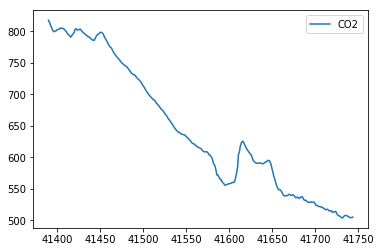

In [34]:
plt.figure()
movie_co2_list[22].plot()
plt.savefig(r'Plots\Buddy_24')

<Figure size 432x288 with 0 Axes>

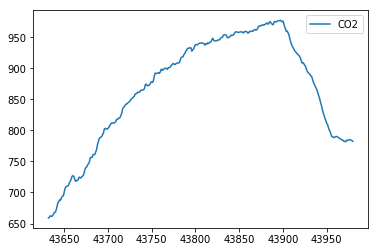

In [35]:
plt.figure()
movie_co2_list[23].plot()
plt.savefig(r'Plots\Walter_25')

<Figure size 432x288 with 0 Axes>

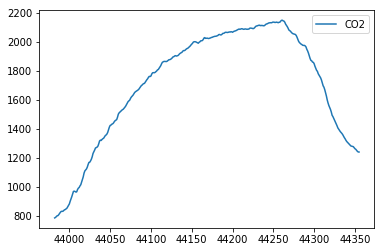

In [36]:
plt.figure()
movie_co2_list[24].plot()
plt.savefig(r'Plots\Walter_26')

<Figure size 432x288 with 0 Axes>

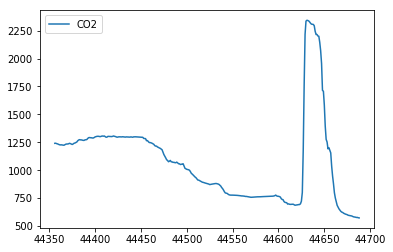

In [37]:
plt.figure()
movie_co2_list[25].plot()
plt.savefig(r'Plots\Walter_27')

<Figure size 432x288 with 0 Axes>

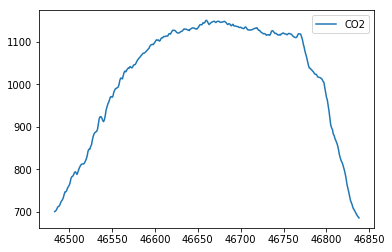

In [38]:
plt.figure()
movie_co2_list[26].plot()
plt.savefig(r'Plots\Walter_28')

<Figure size 432x288 with 0 Axes>

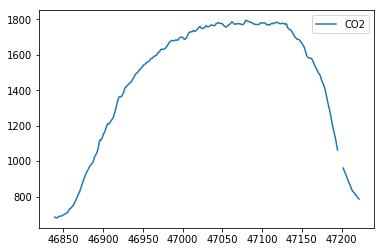

In [39]:
plt.figure()
movie_co2_list[27].plot()
plt.savefig(r'Plots\Walter_29')

<Figure size 432x288 with 0 Axes>

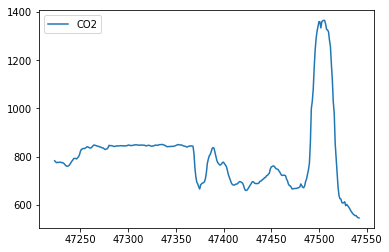

In [40]:
plt.figure()
movie_co2_list[28].plot()
plt.savefig(r'Plots\Walter_30')

<Figure size 432x288 with 0 Axes>

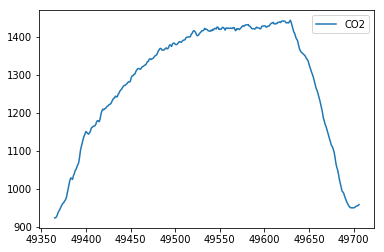

In [41]:
plt.figure()
movie_co2_list[29].plot()
plt.savefig(r'Plots\Walter_31')

<Figure size 432x288 with 0 Axes>

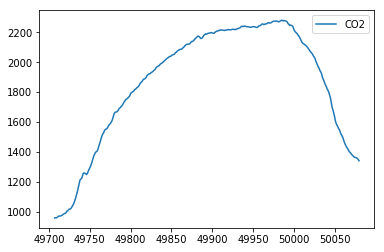

In [42]:
plt.figure()
movie_co2_list[30].plot()
plt.savefig(r'Plots\Walter_32')

<Figure size 432x288 with 0 Axes>

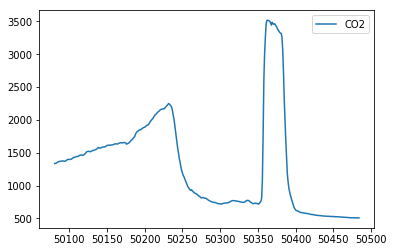

In [43]:
plt.figure()
movie_co2_list[31].plot()
plt.savefig(r'Plots\Walter_33')

<Figure size 432x288 with 0 Axes>

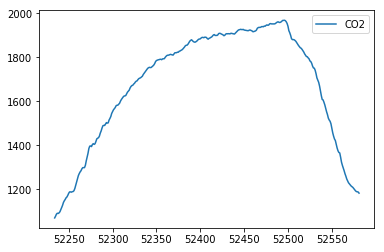

In [44]:
plt.figure()
movie_co2_list[32].plot()
plt.savefig(r'Plots\Walter_34')

<Figure size 432x288 with 0 Axes>

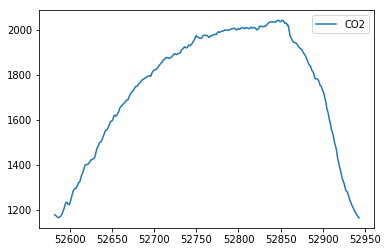

In [45]:
plt.figure()
movie_co2_list[33].plot()
plt.savefig(r'Plots\Walter_35')

<Figure size 432x288 with 0 Axes>

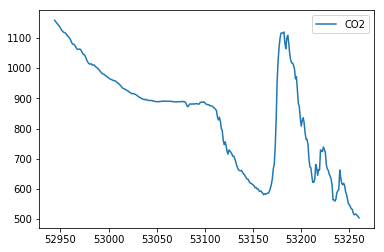

In [46]:
plt.figure()
movie_co2_list[34].plot()
plt.savefig(r'Plots\Walter_36')

<Figure size 432x288 with 0 Axes>

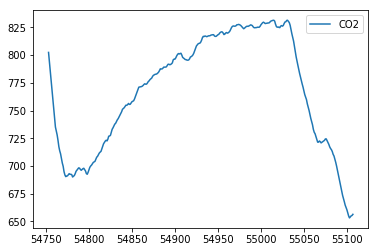

In [47]:
plt.figure()
movie_co2_list[35].plot()
plt.savefig(r'Plots\Walter_37')

<Figure size 432x288 with 0 Axes>

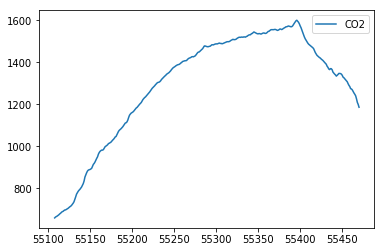

In [48]:
plt.figure()
movie_co2_list[36].plot()
plt.savefig(r'Plots\Walter_38')

<Figure size 432x288 with 0 Axes>

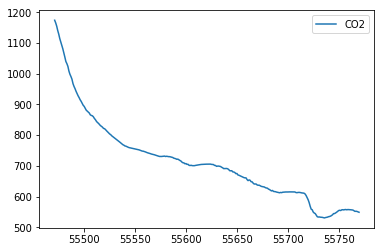

In [49]:
plt.figure()
movie_co2_list[37].plot()
plt.savefig(r'Plots\Walter_39')

<Figure size 432x288 with 0 Axes>

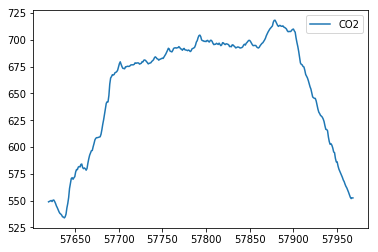

In [50]:
plt.figure()
movie_co2_list[38].plot()
plt.savefig(r'Plots\Walter_40')

<Figure size 432x288 with 0 Axes>

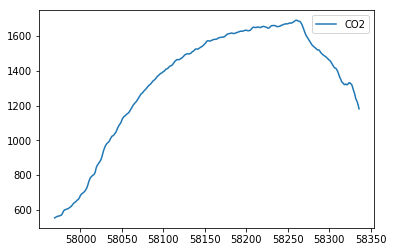

In [51]:
plt.figure()
movie_co2_list[39].plot()
plt.savefig(r'Plots\Walter_41')

<Figure size 432x288 with 0 Axes>

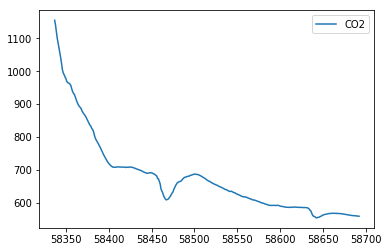

In [52]:
plt.figure()
movie_co2_list[40].plot()
plt.savefig(r'Plots\Walter_42')

<Figure size 432x288 with 0 Axes>

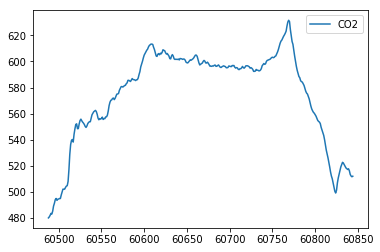

In [53]:
plt.figure()
movie_co2_list[41].plot()
plt.savefig(r'Plots\Walter_43')

<Figure size 432x288 with 0 Axes>

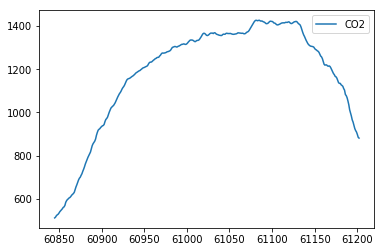

In [54]:
plt.figure()
movie_co2_list[42].plot()
plt.savefig(r'Plots\Walter_44')

<Figure size 432x288 with 0 Axes>

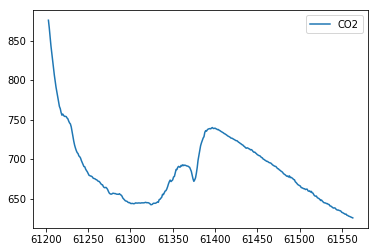

In [55]:
plt.figure()
movie_co2_list[43].plot()
plt.savefig(r'Plots\Walter_45')

<Figure size 432x288 with 0 Axes>

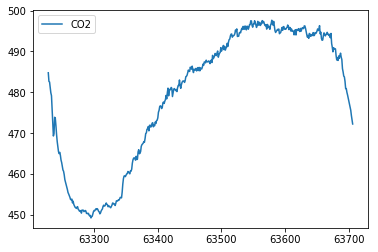

In [56]:
plt.figure()
movie_co2_list[44].plot()
plt.savefig(r'Plots\Hobbit2_46')

<Figure size 432x288 with 0 Axes>

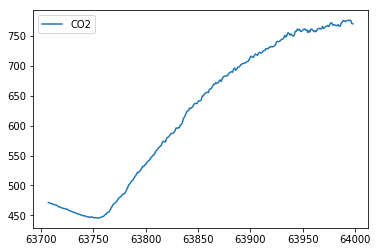

In [57]:
plt.figure()
movie_co2_list[45].plot()
plt.savefig(r'Plots\Paranormal_47')

<Figure size 432x288 with 0 Axes>

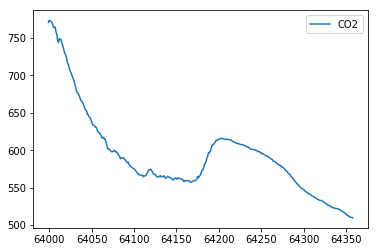

In [58]:
plt.figure()
movie_co2_list[46].plot()
plt.savefig(r'Plots\Paranormal_48')

<Figure size 432x288 with 0 Axes>

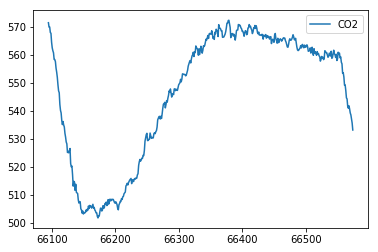

In [59]:
plt.figure()
movie_co2_list[47].plot()
plt.savefig(r'Plots\Hobbit2_49')

<Figure size 432x288 with 0 Axes>

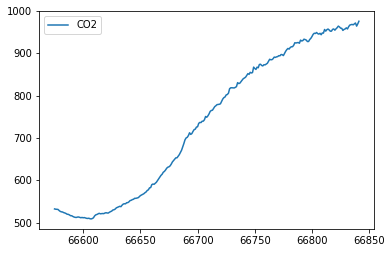

In [60]:
plt.figure()
movie_co2_list[48].plot()
plt.savefig(r'Plots\Paranormal_50')

<Figure size 432x288 with 0 Axes>

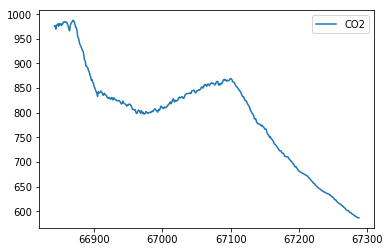

In [61]:
plt.figure()
movie_co2_list[49].plot()
plt.savefig(r'Plots\Paranormal_51')

<Figure size 432x288 with 0 Axes>

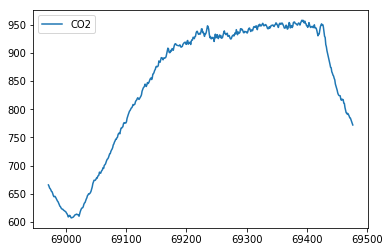

In [62]:
plt.figure()
movie_co2_list[50].plot()
plt.savefig(r'Plots\Hobbit2_52')

<Figure size 432x288 with 0 Axes>

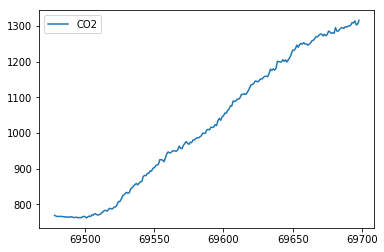

In [63]:
plt.figure()
movie_co2_list[51].plot()
plt.savefig(r'Plots\Paranormal_53')

<Figure size 432x288 with 0 Axes>

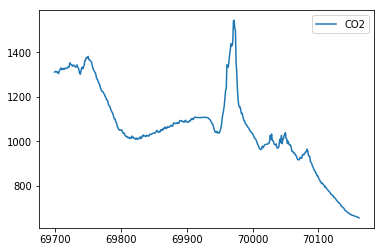

In [64]:
plt.figure()
movie_co2_list[52].plot()
plt.savefig(r'Plots\Paranormal_54')

<Figure size 432x288 with 0 Axes>

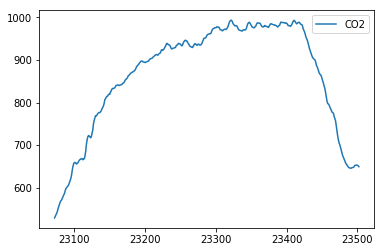

In [65]:
plt.figure()
movie_co2_list[53].plot()
plt.savefig(r'Plots\Hunger Games_55')

<Figure size 432x288 with 0 Axes>

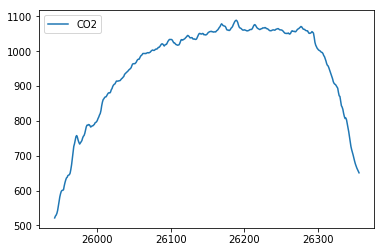

In [66]:
plt.figure()
movie_co2_list[54].plot()
plt.savefig(r'Plots\Hunger Games_56')

<Figure size 432x288 with 0 Axes>

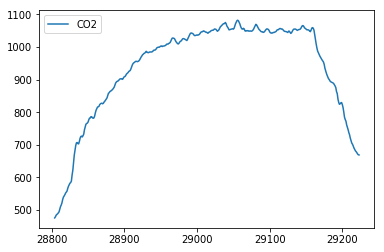

In [67]:
plt.figure()
movie_co2_list[55].plot()
plt.savefig(r'Plots\Hunger Games_57')

<Figure size 432x288 with 0 Axes>

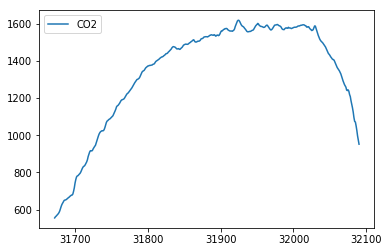

In [68]:
plt.figure()
movie_co2_list[56].plot()
plt.savefig(r'Plots\Hunger Games_58')

<Figure size 432x288 with 0 Axes>

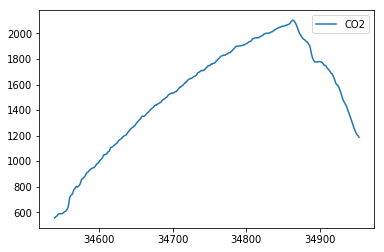

In [69]:
plt.figure()
movie_co2_list[57].plot()
plt.savefig(r'Plots\Hunger Games_59')

<Figure size 432x288 with 0 Axes>

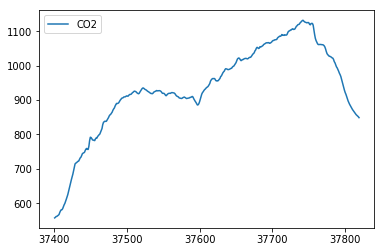

In [70]:
plt.figure()
movie_co2_list[58].plot()
plt.savefig(r'Plots\Hunger Games_60')

<Figure size 432x288 with 0 Axes>

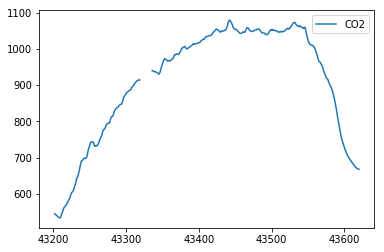

In [71]:
plt.figure()
movie_co2_list[59].plot()
plt.savefig(r'Plots\Hunger Games_61')

<Figure size 432x288 with 0 Axes>

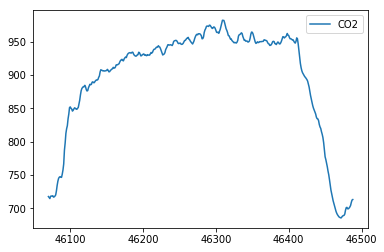

In [72]:
plt.figure()
movie_co2_list[60].plot()
plt.savefig(r'Plots\Hunger Games_62')

<Figure size 432x288 with 0 Axes>

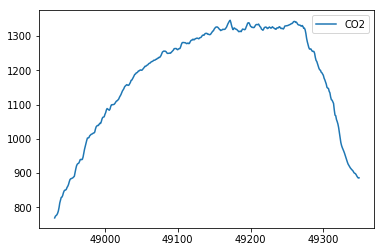

In [73]:
plt.figure()
movie_co2_list[61].plot()
plt.savefig(r'Plots\Hunger Games_63')

<Figure size 432x288 with 0 Axes>

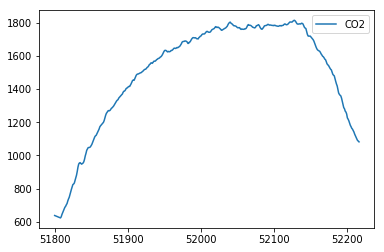

In [74]:
plt.figure()
movie_co2_list[62].plot()
plt.savefig(r'Plots\Hunger Games_64')

<Figure size 432x288 with 0 Axes>

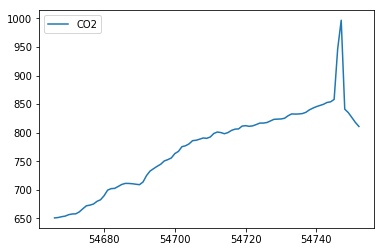

In [75]:
plt.figure()
movie_co2_list[63].plot()
plt.savefig(r'Plots\Hunger Games_65')
#missing data so leave it

<Figure size 432x288 with 0 Axes>

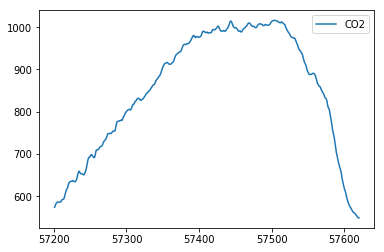

In [76]:
plt.figure()
movie_co2_list[64].plot()
plt.savefig(r'Plots\Hunger Games_66')

<Figure size 432x288 with 0 Axes>

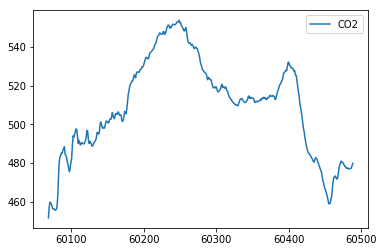

In [77]:
plt.figure()
movie_co2_list[65].plot()
plt.savefig(r'Plots\Hunger Games_67')